In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

import warnings                                            
warnings.simplefilter(action='ignore') 

In [2]:
#loading dataset

df=pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv", delimiter = ';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
new_df=df.copy()

In [4]:
final_df=new_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
df.isnull().sum() # null value counts

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

### EDA

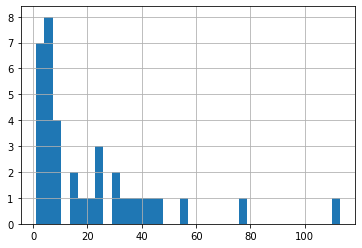

In [9]:
df.ID.value_counts().hist(bins=df.ID.nunique())
plt.show()

In [10]:
df=df.drop('ID',axis=1)

### Univariate Analysis

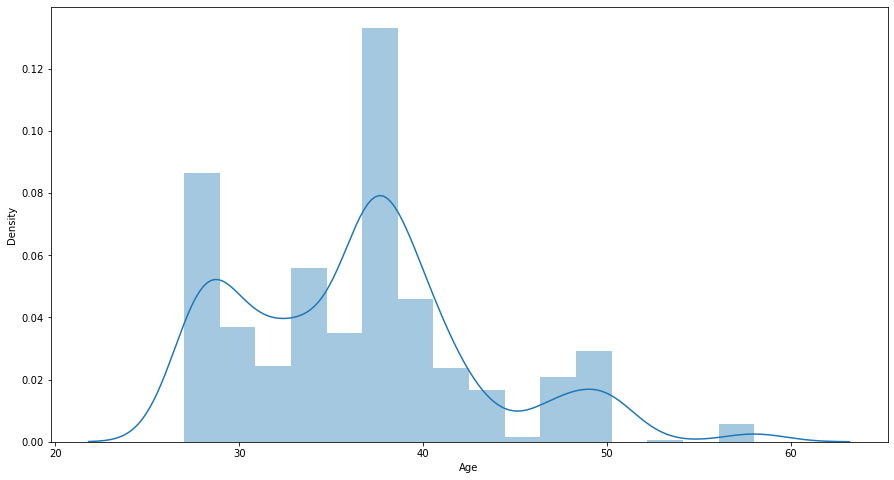

In [11]:
#plotting the plot for univariate analysis

fig, ax=plt.subplots(figsize=(15,8))
ans_plot=sns.distplot(df["Age"])

### Bivariate Analysis

In [12]:
df["Reason for absence"].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

We have 28 Reason for absence from 0-28.

In [13]:
# mapping reason for absence in 4 groups 

df["Reason for absence"]=df["Reason for absence"].map({0:"Reason_1", 1: "Reason_1",2: "Reason_1",3: "Reason_1",4: "Reason_1",
                                                      5: "Reason_1",6:"Reason_1",7:"Reason_1",8:"Reason_1",9:"Reason_1",10:"Reason_1",
                                                      11:"Reason_1",12:"Reason_1",13:"Reason_1",14:"Reason_1",15:"Reason_2",16:"Reason_2",
                                                      17:"Reason_2",18:"Reason_3",19:"Reason_3",20:"Reason_3",21:"Reason_3",
                                                      22:"Reason_4",23:"Reason_4",24:"Reason_4",25:"Reason_4",26:"Reason_4",27:"Reason_4",
                                                      28:"Reason_4"})
df["Reason for absence"].astype("category").cat.codes

0      3
1      0
2      3
3      0
4      3
      ..
735    0
736    0
737    0
738    0
739    0
Length: 740, dtype: int8

In [14]:
df["Reason for absence"].value_counts()

Reason_4    435
Reason_1    232
Reason_3     67
Reason_2      6
Name: Reason for absence, dtype: int64

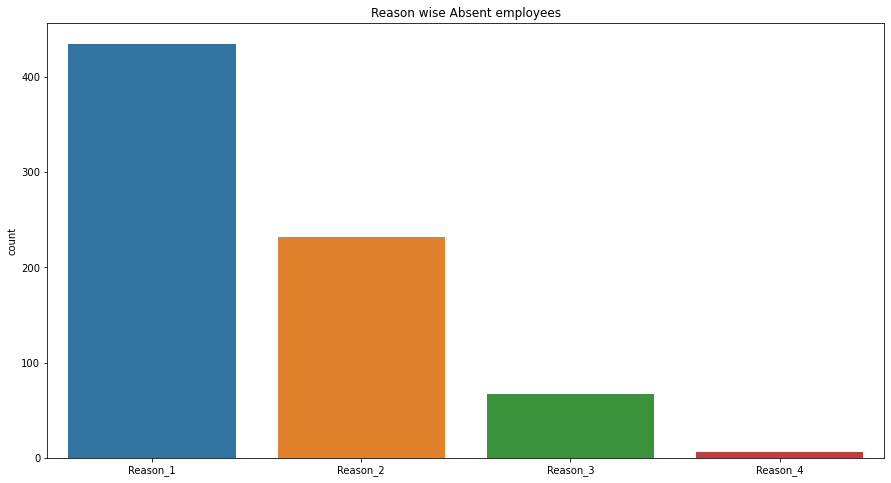

In [15]:
#plotting g plot for bivariate analysis

fig, ax=plt.subplots(figsize=(15,8))
sns.countplot(x=df['Reason for absence'].values,data=df)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0]='Reason_1'
labels[1]='Reason_2'
labels[2]='Reason_3'
labels[3]='Reason_4'
ax.set_xticklabels(labels)
ax.set_title("Reason wise Absent employees")
plt.show()

### Multivariate Analysis

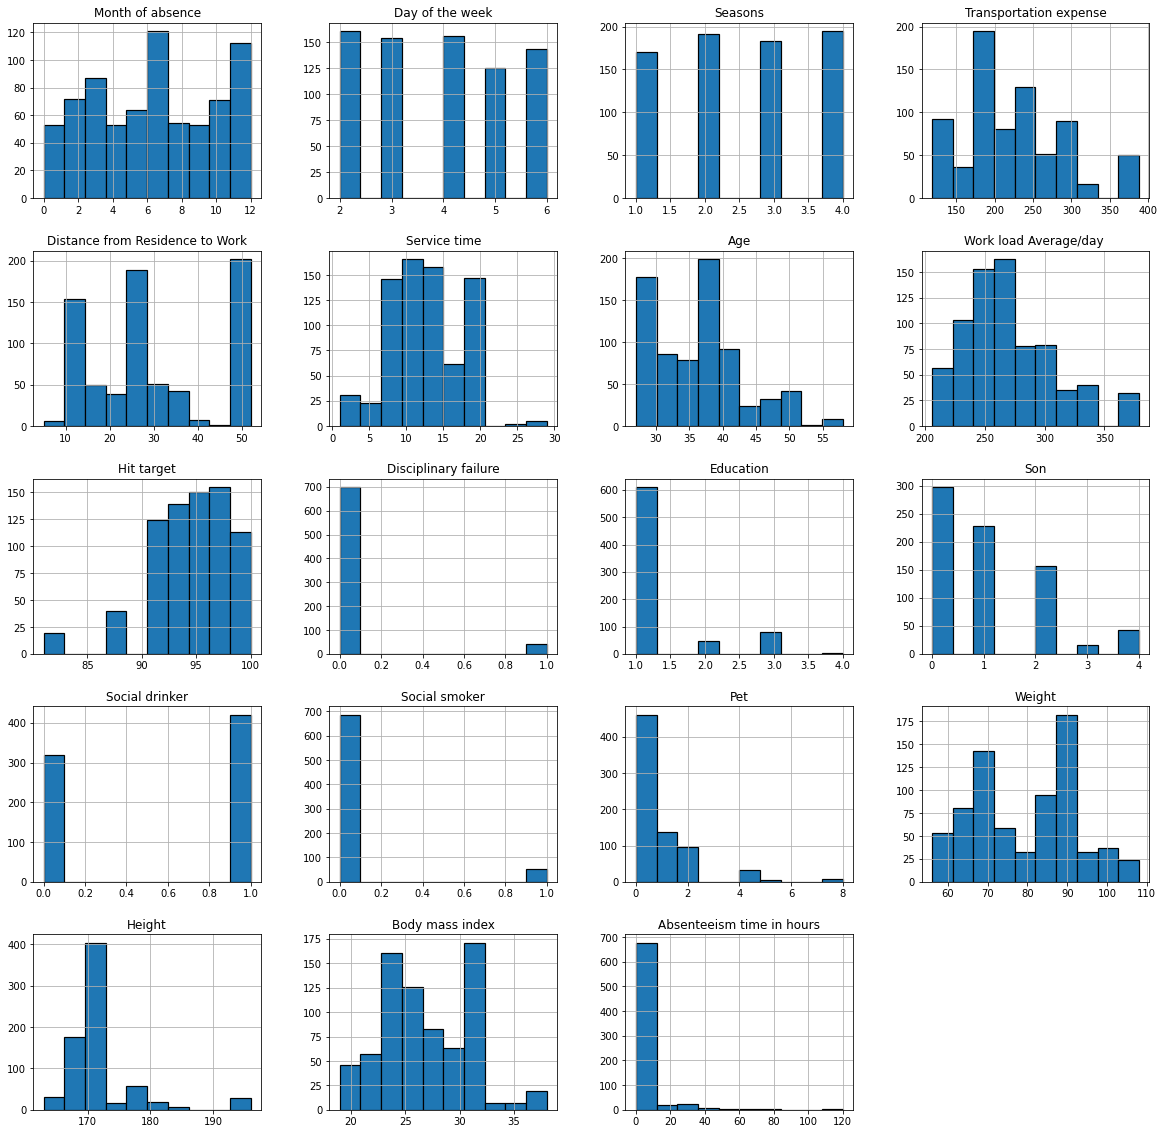

In [16]:
# visualizing the distribution of the data for every feature

df.hist(edgecolor='black',linewidth = 1.2,figsize=(20,20));

The most number of absent employees are between age 35-40.

Most of the employees who absent stay far from the work location.

Absency is higher in between month of 7(July) and 12(December).

Employees who are absent more of them are educated and do not have kids.

In [17]:
# label encoding
df1=pd.get_dummies(df,columns=['Reason for absence'])

In [18]:
df1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Reason_1,Reason for absence_Reason_2,Reason for absence_Reason_3,Reason for absence_Reason_4
0,7,3,1,289,36,13,33,239.554,97,0,...,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239.554,97,1,...,0,0,98,178,31,0,1,0,0,0
2,7,4,1,179,51,18,38,239.554,97,0,...,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239.554,97,0,...,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239.554,97,0,...,0,1,90,172,30,2,0,0,0,1


In [19]:
#grouping data into 2 groups (0-uneducated,1-educated)
df1["Education"]=df1.Education.map({1:0,2:1,3:1,4:1})

In [20]:
df1.Education.value_counts()

0    611
1    129
Name: Education, dtype: int64

In [21]:
df2=pd.get_dummies(df1,columns=['Education'],drop_first=True)

In [22]:
df2.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Reason_1,Reason for absence_Reason_2,Reason for absence_Reason_3,Reason for absence_Reason_4,Education_1
0,7,3,1,289,36,13,33,239.554,97,0,...,1,90,172,30,4,0,0,0,1,0
1,7,3,1,118,13,18,50,239.554,97,1,...,0,98,178,31,0,1,0,0,0,0
2,7,4,1,179,51,18,38,239.554,97,0,...,0,89,170,31,2,0,0,0,1,0
3,7,5,1,279,5,14,39,239.554,97,0,...,0,68,168,24,4,1,0,0,0,0
4,7,5,1,289,36,13,33,239.554,97,0,...,1,90,172,30,2,0,0,0,1,0


In [23]:
new_df=new_df.drop('ID',axis=1)

In [24]:
#dividing columns to numerical and categorical

categorical_atts =['Reason for absence','Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet', 'Son']
numerical_atts = new_df.drop(columns = categorical_atts).columns.to_list()



In [25]:
#number of unique values in categorical atts
new_df[categorical_atts].nunique()

Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

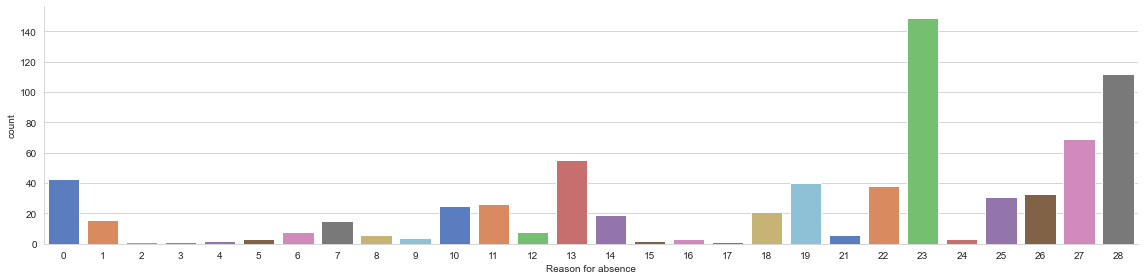

In [26]:
#plot distribution of "reason for absence" column
sns.set_style("whitegrid")
sns.catplot(data=new_df,x='Reason for absence',kind = 'count', size = 4, aspect = 4, palette = 'muted')
plt.show()

In [27]:
num_df=new_df[numerical_atts]


In [28]:
corr=num_df.corr()
corr 

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,0.455975,-0.053135,0.499718,0.019029
Age,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,-0.038522,0.103315,-0.090709,0.024749
Hit target,-0.080193,-0.013865,-0.007840,-0.039224,-0.089445,1.000000,-0.044947,0.093267,-0.088939,0.026695
Weight,-0.207435,-0.047859,0.455975,0.418730,-0.038522,-0.044947,1.000000,0.306802,0.904117,0.015789
Height,-0.194496,-0.353372,-0.053135,-0.062997,0.103315,0.093267,0.306802,1.000000,-0.121049,0.144420
Body mass index,-0.136517,0.113772,0.499718,0.470688,-0.090709,-0.088939,0.904117,-0.121049,1.000000,-0.049719
Absenteeism time in hours,0.027585,-0.088363,0.019029,0.065760,0.024749,0.026695,0.015789,0.144420,-0.049719,1.000000


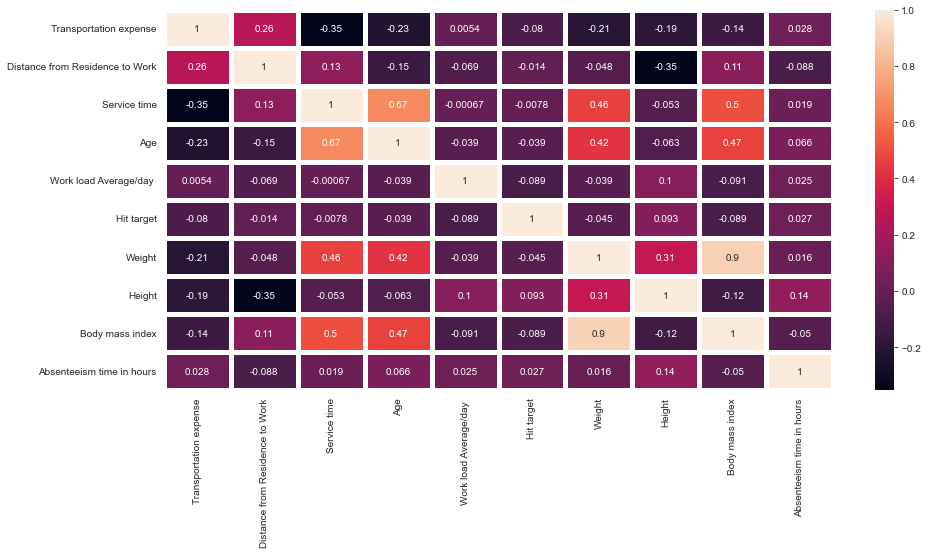

In [29]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(corr,annot=True,linewidth=5)
plt.show()

In [30]:
df3=df2.drop(["Distance from Residence to Work","Month of absence","Day of the week","Age"],axis=1)

In [31]:
df3

,Seasons,Transportation expense,Service time,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Reason_1,Reason for absence_Reason_2,Reason for absence_Reason_3,Reason for absence_Reason_4,Education_1
0,1,289,13,239.554,97,0,2,1,0,1,90,172,30,4,0,0,0,1,0
1,1,118,18,239.554,97,1,1,1,0,0,98,178,31,0,1,0,0,0,0
2,1,179,18,239.554,97,0,0,1,0,0,89,170,31,2,0,0,0,1,0
3,1,279,14,239.554,97,0,2,1,1,0,68,168,24,4,1,0,0,0,0
4,1,289,13,239.554,97,0,2,1,0,1,90,172,30,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,289,13,264.604,93,0,2,1,0,1,90,172,30,8,1,0,0,0,0
736,1,235,14,264.604,93,0,1,0,0,1,88,172,29,4,1,0,0,0,1
737,1,118,13,271.219,95,0,1,1,0,8,98,170,34,0,1,0,0,0,0
738,2,231,14,271.219,95,0,2,1,0,2,100,170,35,0,1,0,0,0,0


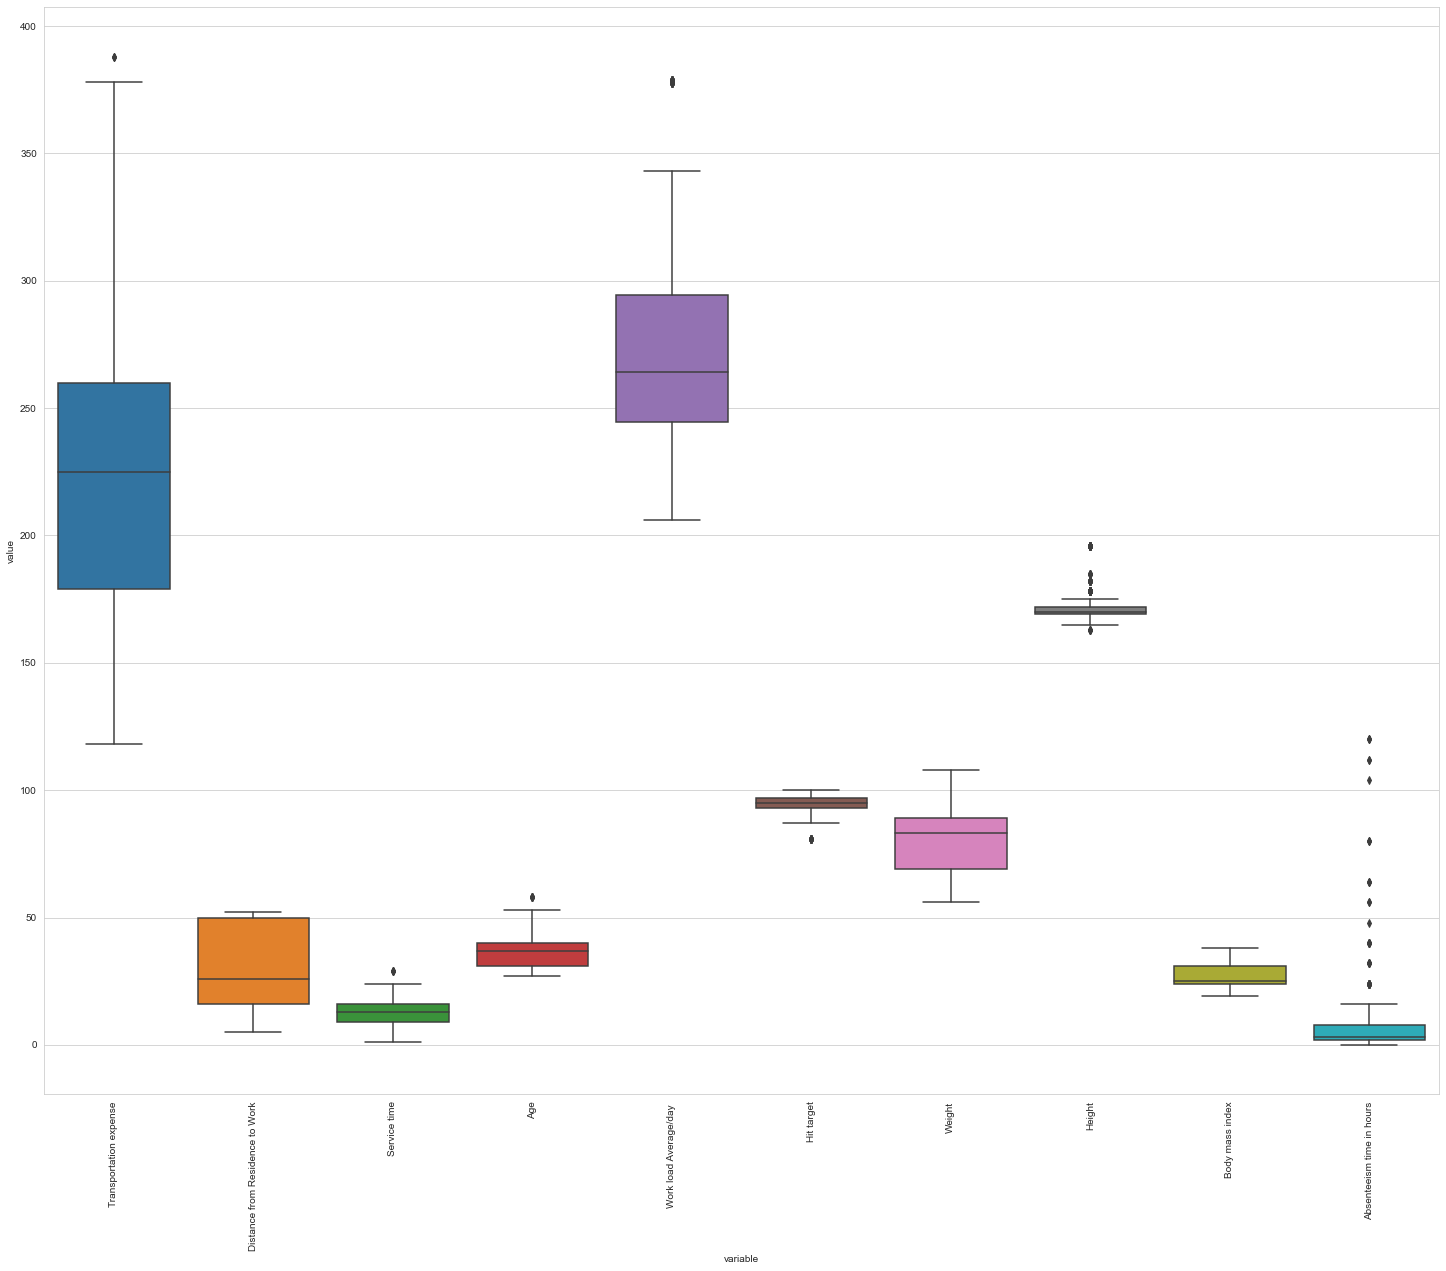

In [32]:
#boxplot for numerical data

plt.figure(figsize=(25,20))
sns.boxplot(x="variable",y="value",data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()

In [34]:
#Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    
    #Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(num_df[num_att], [75,25])
    MEAN = num_df[num_att].mean()
    
    #Calculating Interquartile range
    IQR = Q3 - Q1
    
    #Calculatin upper extreme and lower extreme
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    #Replacing all the outliers value to Mean
    new_df_clean = num_df.drop(num_df.loc[num_df[num_att]<minimum, num_att].index)
    new_df_clean = num_df.drop(num_df.loc[num_df[num_att]>maximum, num_att].index)

    

In [35]:
len(new_df_clean)

696

In [36]:
y=new_df_clean[['Absenteeism time in hours']]

In [37]:
X=new_df_clean.drop('Absenteeism time in hours',axis=1)

### Standard Scaler 
Standard Scaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1

In [38]:
#scaling the data

from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
std=std_scl.fit(X)
X_scaled=std.transform(X)


#### (we don't need to split the data since this model is just for feature importances)

### KMeans Clustering 
kmeans clustering uses centroids, k different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average oif all of the points assigned to it.

In [39]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4).fit(X_scaled)    # n_clusters-number of clusters to be formed


In [40]:
# transformed X_scaled data
k1=kmeans.transform(X_scaled)    

In [41]:
kmeans.labels_                     #labels= clusters

array([1, 3, 1, 2, 1, 1, 0, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 1, 2, 0, 3, 1, 1, 3, 3,
       1, 2, 2, 2, 0, 0, 3, 1, 3, 0, 1, 2, 1, 1, 2, 1, 3, 3, 0, 1, 0, 3,
       0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 3, 0, 2, 0,
       2, 1, 0, 2, 1, 3, 3, 0, 2, 0, 0, 2, 0, 0, 3, 2, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 0, 1, 0, 2, 1,
       3, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 3, 2, 3, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3,
       3, 0, 2, 3, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 3, 3, 1, 0, 0, 3, 1, 2,
       0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 1, 0, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 3, 1,
       2, 1, 1, 3, 1, 1, 3, 1, 0, 3, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 0, 3,
       0, 2, 2, 0, 0, 0, 3, 3, 1, 1, 2, 2, 2, 1, 0,

"inertia_" attribute provides sum of squared distances of samples to their closest cluster center.We can plot it and decide on the parameter "n_clusters"by using elbow method.

In [42]:
kmeans.inertia_

3643.467748240725

In [43]:
kmeans.n_iter_                             #No. of time the k-means algorithms runs with different centroids

6

In [44]:
kmeans.cluster_centers_       #centers = centroid, A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

array([[ 0.22691661, -0.05191831, -1.16350139, -1.16889378,  0.04632687,
         0.11430126, -0.78957437,  0.06938286, -0.84152821],
       [-0.0693677 ,  0.7763294 ,  0.84195088,  0.45257347, -0.17755286,
        -0.0777133 ,  0.93749194, -0.45372726,  1.18342752],
       [ 0.70484608,  0.12442702,  0.14253388,  0.37831829,  0.10539178,
        -0.08331151, -0.85963693, -0.33777637, -0.74032444],
       [-1.11580808, -1.24216537,  0.2296368 ,  0.51939404,  0.06491947,
         0.05790877,  0.82267291,  1.00631288,  0.37867962]])

In [45]:
# getting each cluster size

from collections import Counter   #counter, counts the number of each cluster
Counter(kmeans.labels_)

Counter({1: 200, 3: 134, 2: 170, 0: 192})

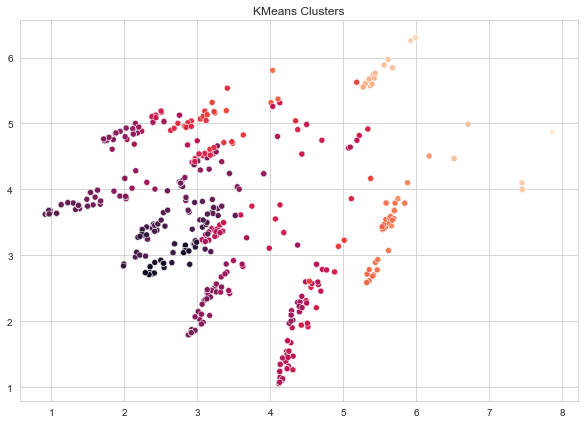

In [46]:
plt.figure(figsize=(10,7))
sns.scatterplot(k1[:,0],k1[:,1],c=k1[:,2],
               palette=sns.color_palette('hls',np.unique(kmeans.labels_).shape[0]))
plt.title("KMeans Clusters")
plt.show()

## Silhouette Score
Silhouete Coefficent or silhouete score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

For n_clusters= 2 The average silhouette_score is : 0.39276649713135897
For n_clusters= 3 The average silhouette_score is : 0.37491906765577543
For n_clusters= 4 The average silhouette_score is : 0.35222055154066817
For n_clusters= 5 The average silhouette_score is : 0.3796628990578084
For n_clusters= 6 The average silhouette_score is : 0.38959740069956816


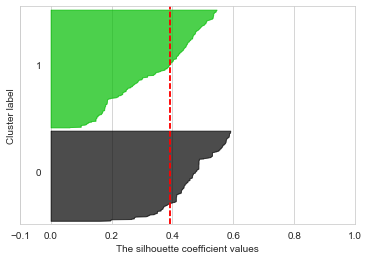

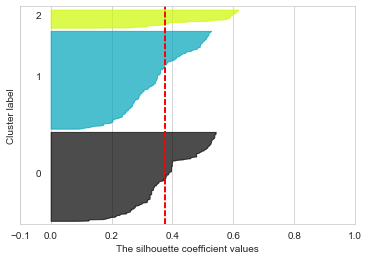

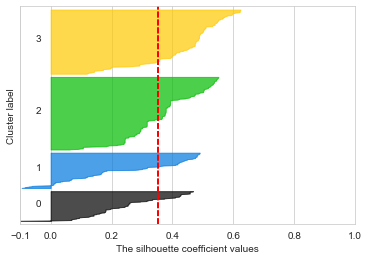

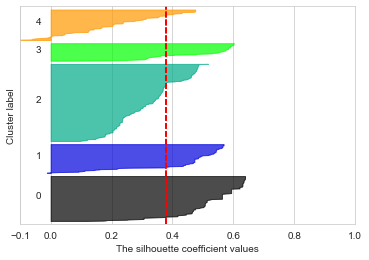

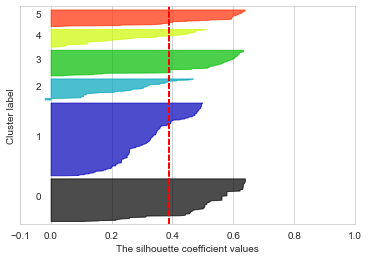

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    #creating a subplot with 1 row and 2 columns
    fig, ax1=plt.subplots(1, 1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters)
    cluster_labels=clusterer.fit_predict(X)
    
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=",n_clusters,"The average silhouette_score is :",silhouette_avg)
    
    #Computting the silhouette scores for each sample
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range (n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                         0,ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,alpha=0.7)
        
        #label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        
        #compute the new y_lower for next plot
        y_lower = y_upper+10   #10 for the 0 samples
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # the vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
        ax1.set_yticks([]) # clear the yaxis labels/ ticks
        ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        
plt.show()
    

## Elbow Curve

The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases.

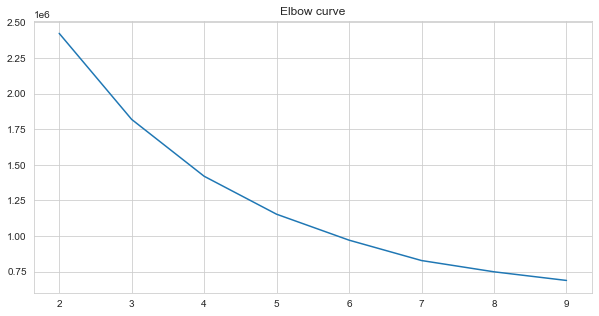

In [48]:
#plotting elbow curve

distorsions=[]          #Data distortion is the deviation of data from its true or most accurate representation of the full picture; bad data may interject incorrect or misguided “facts” into useful information or, worse, into models and predictions of customers or business.
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig=plt.figure(figsize=(10,5))
plt.plot(range(2,10),distorsions)
plt.grid(True)
plt.title('Elbow curve');
plt.show()

## DBSCAN (Density-based spatial clustering of applications with noise)
It is able to find arbitary shaped clusters and clusters with noise (i.e. outliers).

In [49]:
from sklearn.cluster import DBSCAN

db=DBSCAN().fit(X_scaled)   

In [50]:
clusters=db.fit_predict(X_scaled)

In [51]:
db.labels_

array([-1,  0,  1, -1, -1,  1, -1,  2, 27,  2,  2,  2,  1,  1,  3,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  4,  5, 31, -1,  4,  5,  6,  7,  7,  8,  8,  4,
        9, 10,  8,  5, -1, 11,  5,  7,  5,  4, 10, -1,  5,  8,  4,  8, 11,
        6,  5,  8,  7,  6,  8,  9, 12,  7, -1, 13, -1, -1, -1, -1, 13, -1,
       13, -1, 13, -1, -1, 13, -1, -1, -1, -1, 14,  2, -1, 14,  2, 14, -1,
       15,  3, 14, 16, 17, 17, -1, 16, -1, 16, 16, 17, 16, 17, 17, 17, 17,
       17, 17, 18, 35, 17, -1, 17, 17, 16, 35, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 19, -1, 19, 19, -1, 19, 19, -1, -1,
       19, -1, 19, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 35, -1, 35,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 15, 15,
       -1, 20, -1, -1, -1

In [52]:
# getting each cluster size

Counter(db.labels_)

Counter({-1: 328,
         0: 9,
         1: 49,
         2: 13,
         27: 6,
         3: 10,
         4: 19,
         5: 19,
         31: 5,
         6: 8,
         7: 11,
         8: 17,
         9: 11,
         10: 8,
         11: 5,
         12: 5,
         13: 5,
         14: 13,
         15: 11,
         16: 6,
         17: 12,
         18: 5,
         35: 5,
         19: 7,
         20: 10,
         21: 4,
         22: 8,
         23: 5,
         24: 6,
         25: 5,
         30: 6,
         26: 5,
         28: 6,
         29: 11,
         38: 6,
         32: 6,
         33: 5,
         34: 6,
         36: 5,
         37: 15})

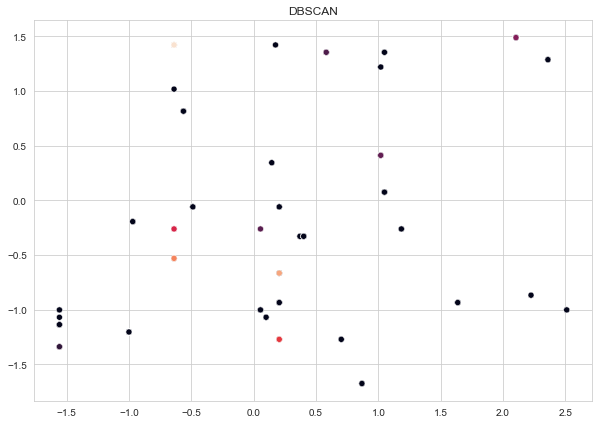

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_scaled[:,0],X_scaled[:,1],c=clusters,
               palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.title("DBSCAN")
plt.show()

# Agglomerative Clustering

Agglomerative Clustering is a botom-up strategy in which each data point is originally a custer of its own, and s one travels up the hierarchy, more pairs of clusters are combined.In it, two nearest clusters are taken and joined to form one singlecluster

In [54]:
#scaling the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal of measurements above and below the mean value.

In [55]:
#Normalizing the data so that the data approximately follows gaussian distribution

from sklearn.preprocessing import normalize
X_normalized = normalize(X_scaled)

In [56]:
#converting the numpy array into pandas dataframe

X_normalized=pd.DataFrame(X_normalized)

#### Principal Components analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of "summary indices" that can be more easily visualized and analyzed.

In [57]:
#The number of input variables or features for a dataset is referred to as its dimensionality.
#reducing the dimensionality of the data

from sklearn.decomposition import PCA
pca= PCA(n_components=2)  #number of principal components

X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']

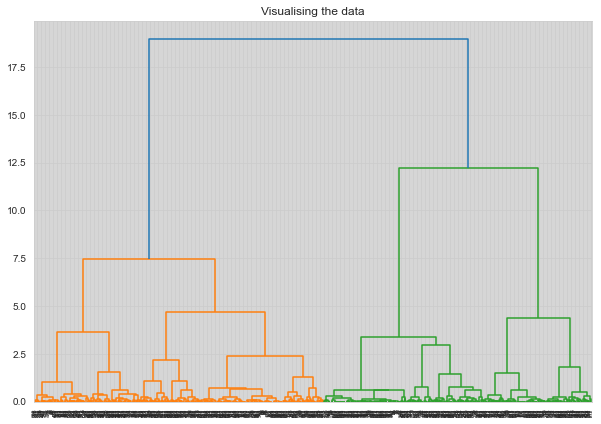

In [58]:
#visualizing the working of the dendrogram
import scipy.cluster.hierarchy as shc    
plt.figure(figsize=(10,7))                   # dendrograms are used to divide a given cluster into many different clusters
plt.title("Visualising the data")
Dendrogram=shc.dendrogram((shc.linkage(X_principal, method='ward')))

A dendogram is a diagram that shows the hierarchical relationship between objects. It is commonly created as an output from hierarchical clustering. The main use of a dendogram is to work out the best way to allocate objects to clusters.

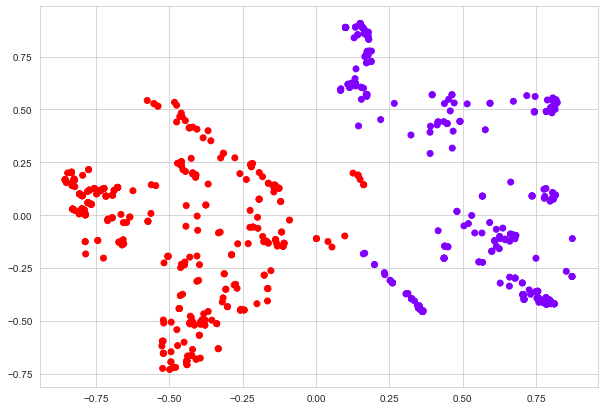

In [59]:
from sklearn.cluster import AgglomerativeClustering

# Visualizing the clustering models

# for 2 clusters
k=2
ac2=AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(10,7))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac2.fit_predict(X_principal),cmap='rainbow')
plt.show()

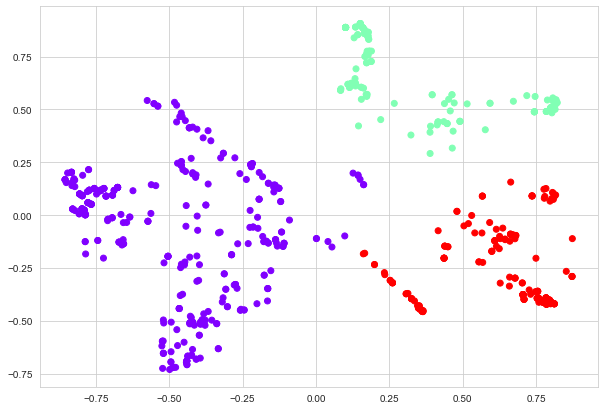

In [60]:
k=3    # for 3 clusters
ac3=AgglomerativeClustering(n_clusters=3)
plt.figure(figsize=(10,7))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac3.fit_predict(X_principal),cmap='rainbow')
plt.show()

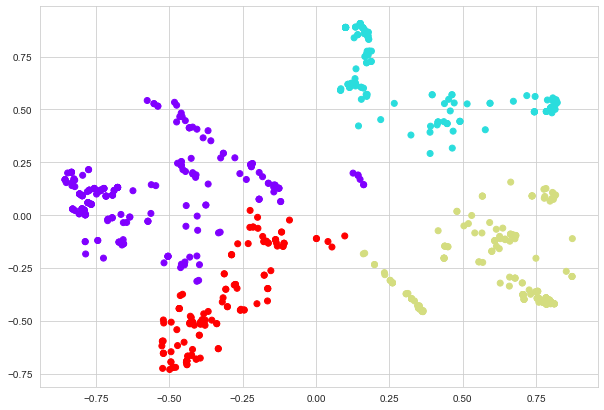

In [61]:
k=4    # for 4 clusters
ac4=AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(10,7))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac4.fit_predict(X_principal),cmap='rainbow')
plt.show()

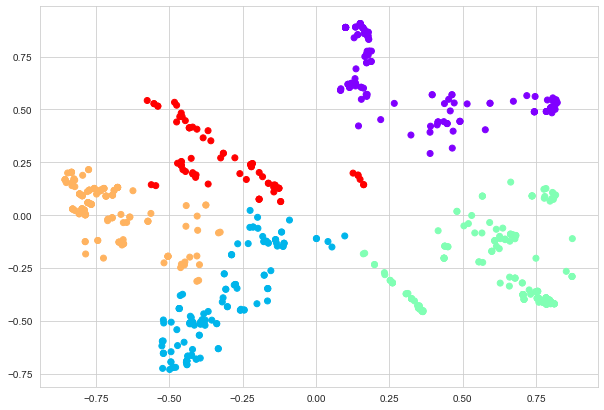

In [62]:
k=5    #for 5 clusters
ac5=AgglomerativeClustering(n_clusters=5)
plt.figure(figsize=(10,7))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac5.fit_predict(X_principal),cmap='rainbow')
plt.show()

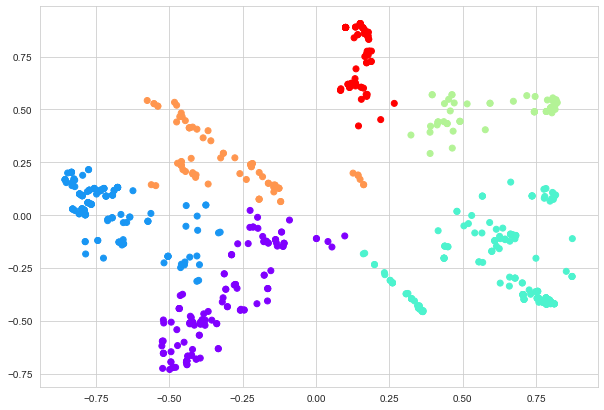

In [63]:
k=6  # for 6 clusters
ac6=AgglomerativeClustering(n_clusters=6)
plt.figure(figsize=(10,7))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac6.fit_predict(X_principal),cmap='rainbow')
plt.show()

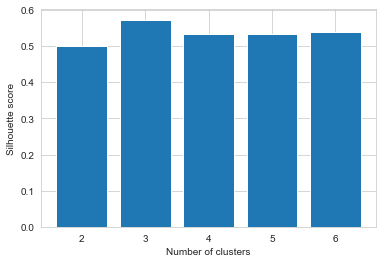

In [64]:
k=[2,3,4,5,6]
# finding the silhoette scores  of the different models(clusters) 

silhouette_scores=[]
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))

#plotting the bar graph to compare the results for different number of clusters

plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Optimal number of clusters for the given data and clustering technique is 3.

# CONCLUSION:

### We performed different clustering algorithms,the results of all the clustering algorithms are different as compared with each other, where Agglomeratrive clustering algorithm/model shows a better visual with all the clusters and outliers and kMeans performing a little good.


### So, as per all the algorithms, Agglomerative performs the best and this algorithm also provides a clear visual with the clusters